In [1]:
if 'google.colab' in str(get_ipython()):
  !curl -s https://raw.githubusercontent.com/yminchen/MEAM517_Colab/master/colab_drake_setup > jupyter_setup.py
  from jupyter_setup import setup_drake
  setup_drake()

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  200M  100  200M    0     0  28.7M      0  0:00:06  0:00:06 --:--:-- 34.6M
Reading package lists...
Building dependency tree...
Reading state information...
libfreetype6 is already the newest version (2.8.1-2ubuntu2).
libfreetype6 set to manually installed.
libglu1-mesa is already the newest version (9.0.0-2.1build1).
libglu1-mesa set to manually installed.
libjsoncpp1 is already the newest version (1.7.4-3).
libjsoncpp1 set to manually installed.
liblapack3 is already the newest version (3.7.1-4ubuntu1).
liblapack3 set to manually installed.
libogg0 is already the newest version (1.3.2-1).
libogg0 set to manually installed.
libtheora0 is already the newest version (1.1.1+dfsg.1-14).
libtheora0 set to manually installed.
libxt6 is already the newest version (1:1.1.5-1).
libxt6 set to manually installed.
python3-numpy is alread

In [2]:
"""
Synchronize homework files (either save files to google drive or copy files from github/google drive) 
"""
if 'google.colab' in str(get_ipython()):
  # !curl -s https://raw.githubusercontent.com/yminchen/MEAM517_Colab/test/test/sync_hw2.py > sync_hw2.py
  !pip install wget
  from sync_hw2 import sync_hw2
  sync_hw2()

  Created wheel for wget: filename=wget-3.2-cp36-none-any.whl size=9682 sha256=a7a35ad2dd0d218d5f477627c7698e18c1186855e1eaa4ee2d6e271616c9839c
  Stored in directory: /root/.cache/pip/wheels/40/15/30/7d8f7cea2902b4db79e3fea550d7d7b85ecb27ef992b618f3f
Successfully built wget
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


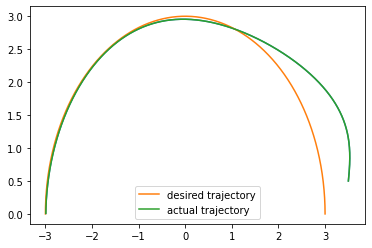

In [3]:
%matplotlib inline

import numpy as np
from math import sin, cos, pi
from scipy.integrate import solve_ivp
from trajectories import *
import matplotlib.pyplot as plt

from quad_sim import simulate_quadrotor
from quadrotor import Quadrotor

tf = pi;
R = np.eye(2);
Q = np.diag([10, 10, 1, 1, 1, 1]);
Qf = Q;

quadrotor = Quadrotor(Q, R, Qf, tf);

x0 = 0.5 * np.ones((6,)) + x_d(0.0)
x, u, t = simulate_quadrotor(x0, tf, quadrotor)
plt.plot(x[:, 0], x[:, 1])

n_samples = 1000
t_samples = np.linspace(0.0, tf, n_samples)
x_des = np.zeros((n_samples, 6))
for i in range(t_samples.shape[0]):
  x_des[i] = x_d(t_samples[i])
plt.plot(x_des[:, 0], x_des[:, 1], label='desired trajectory')
plt.plot(x[:, 0], x[:, 1], label='actual trajectory')
plt.legend()
plt.show()